In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 
from bidi.algorithm import get_display
from arabic_reshaper import reshape
import colorcet as cc
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from category_encoders import TargetEncoder
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import  ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("E:\Python Scripts\courses-main\machine learning\Regression_TheranHousing-main\Data.csv",encoding="utf-8")
df.head()

,total_value,neighborhood,area,year,deposit,rent,elavator,parking,warehouse
0,2.000900e+09,ولنجک,270,1399,2.000000e+09,30000000.0,1,1,1
1,2.001200e+08,کوی فردوس,70,1387,2.000000e+08,4000000.0,0,1,1
2,3.502550e+08,پونک,120,1395,3.500000e+08,8500000.0,1,1,1
3,2.003000e+08,هروی,110,1395,2.000000e+08,10000000.0,1,1,1
4,2.001800e+08,پونک,80,1387,2.000000e+08,6000000.0,1,1,1


In [5]:
df.sample(10)

,total_value,neighborhood,area,year,deposit,rent,elavator,parking,warehouse
8285,3.006000e+08,سعادت‌آباد,170,1392,3.000000e+08,20000000.0,1,1,1
11635,1.680000e+09,اختیاریه,185,1399,1.680000e+09,0.0,1,1,1
568,1.500000e+09,زعفرانیه,150,1395,1.500000e+09,0.0,1,1,1
10910,5.000000e+08,سعادت‌آباد,65,1395,5.000000e+08,0.0,1,1,1
4214,0.000000e+00,جردن,160,1386,0.000000e+00,0.0,1,1,1
164,2.702100e+08,شهرآرا,94,1399,2.700000e+08,7000000.0,1,1,1
5576,0.000000e+00,شهرک غرب,300,1385,0.000000e+00,0.0,0,1,1
104,2.001800e+08,جنت‌آباد جنوبی,82,1394,2.000000e+08,6000000.0,1,1,1
11632,1.000300e+08,جیحون,55,1395,1.000000e+08,1000000.0,1,0,1
2711,6.800000e+08,امیرآباد,100,1398,6.800000e+08,0.0,1,1,1


In [6]:
df.tail()

,total_value,neighborhood,area,year,deposit,rent,elavator,parking,warehouse
12378,700000000.0,مرزداران,170,1375,700000000.0,0.0,0,1,1
12379,100081000.0,امیریه,91,1380,100000000.0,2700000.0,0,1,1
12380,200180000.0,دارآباد,80,1395,200000000.0,6000000.0,1,1,1
12381,800000000.0,پاسداران,100,1399,800000000.0,0.0,1,1,1
12382,100180000.0,نارمک,90,1398,100000000.0,6000000.0,1,1,1


In [7]:
df.shape

(12383, 9)

In [8]:
df.columns

Index(['total_value', 'neighborhood', 'area', 'year', 'deposit', 'rent',
       'elavator', 'parking', 'warehouse'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12383 entries, 0 to 12382
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   total_value   12383 non-null  float64
 1   neighborhood  12383 non-null  object 
 2   area          12383 non-null  int64  
 3   year          12383 non-null  int64  
 4   deposit       12383 non-null  float64
 5   rent          12383 non-null  float64
 6   elavator      12383 non-null  int64  
 7   parking       12383 non-null  int64  
 8   warehouse     12383 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 870.8+ KB


In [10]:
#Change type neighborhood column
category_col = ['neighborhood']
df[category_col] = df[category_col].astype('string')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12383 entries, 0 to 12382
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   total_value   12383 non-null  float64
 1   neighborhood  12383 non-null  string 
 2   area          12383 non-null  int64  
 3   year          12383 non-null  int64  
 4   deposit       12383 non-null  float64
 5   rent          12383 non-null  float64
 6   elavator      12383 non-null  int64  
 7   parking       12383 non-null  int64  
 8   warehouse     12383 non-null  int64  
dtypes: float64(3), int64(5), string(1)
memory usage: 870.8 KB


In [12]:
df.nunique()

total_value     2051
neighborhood     314
area             288
year              30
deposit          293
rent             233
elavator           2
parking            2
warehouse          2
dtype: int64

In [5]:
map(list(df['neighborhood'])

[' ولنجک ',
 ' کوی فردوس ',
 ' پونک ',
 ' هروی ',
 ' پونک ',
 ' جنت\u200cآباد جنوبی ',
 ' جنت\u200cآباد جنوبی ',
 ' ستارخان ',
 ' سعادت\u200cآباد ',
 ' سعادت\u200cآباد ',
 ' تهرانپارس شرقی ',
 ' اختیاریه ',
 ' فرمانیه ',
 ' اقدسیه ',
 ' سلسبیل ',
 ' الهیه ',
 ' ظفر ',
 ' پاسداران ',
 ' پاسداران ',
 ' میرداماد ',
 ' سعادت\u200cآباد ',
 ' سعادت\u200cآباد ',
 ' دروس ',
 ' پاسداران ',
 ' زعفرانیه ',
 ' نواب ',
 ' سعادت\u200cآباد ',
 ' سعادت\u200cآباد ',
 ' نیاوران ',
 ' سوهانک ',
 ' قیطریه ',
 ' قیطریه ',
 ' هفت چنار ',
 ' فرمانیه ',
 ' محمودیه ',
 ' شاهین ',
 ' نارمک ',
 ' ظفر ',
 ' مبارک\u200cآباد بهشتی ',
 ' پونک ',
 ' کوی فردوس ',
 ' فرمانیه ',
 ' پونک ',
 ' امیرآباد ',
 ' مینا ',
 ' جردن ',
 ' شاهین ',
 ' دروس ',
 ' گیشا (کوی نصر) ',
 ' دریاچه شهدای خلیج فارس ',
 ' حکیمیه ',
 ' پونک ',
 ' پاسداران ',
 ' اقدسیه ',
 ' هروی ',
 ' قلهک ',
 ' قلهک ',
 ' شهر زیبا ',
 ' افسریه ',
 ' سلسبیل ',
 ' نیاوران ',
 ' اقدسیه ',
 ' گرگان ',
 ' جی ',
 ' اقدسیه ',
 ' فرمانیه ',
 ' سعادت\u200cآباد ',
 ' 

In [16]:
def reshape_persian_text(labels):
    reshape_label=[]
    for label in labels:
         reshape_label.append(get_display(reshape(label)))
    return reshape_label

In [30]:
map(reshape_persian_text,list(df['neighborhood'].value_counts()))

In [26]:
pd.Series(list(df['neighborhood']))

0             ولنجک 
1         کوی فردوس 
2              پونک 
3              هروی 
4              پونک 
            ...     
12378      مرزداران 
12379        امیریه 
12380       دارآباد 
12381      پاسداران 
12382         نارمک 
Length: 12383, dtype: object

<AxesSubplot:>

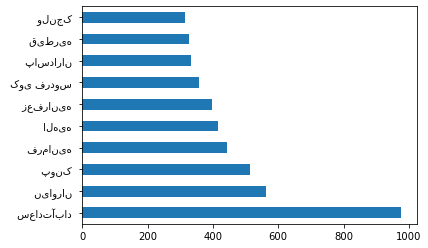

In [29]:
pd.Series(list(df['neighborhood'])).value_counts().head(10).plot(kind='barh')

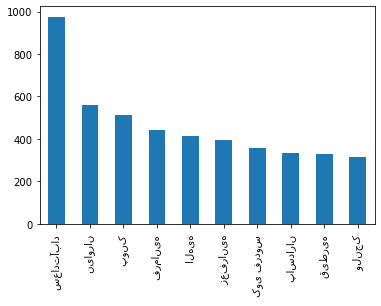

In [23]:
df['neighborhood'].value_counts().head(10).plot(kind='bar');

### EDA & Visualization

In [13]:
df.describe().T#zero total_values 

,count,mean,std,min,25%,50%,75%,max
total_value,12383.0,4.958421e+08,8.858276e+08,0.0,100180000.0,300000000.0,550900000.0,5.000014e+10
area,12383.0,1.715212e+02,2.979646e+03,5.0,80.0,115.0,155.0,3.000000e+05
year,12383.0,1.391682e+03,6.686362e+00,1363.0,1387.0,1393.0,1397.0,1.399000e+03
deposit,12383.0,4.952882e+08,8.856925e+08,0.0,100000000.0,300000000.0,550000000.0,5.000000e+10
rent,12383.0,1.846474e+07,4.773774e+08,0.0,0.0,1500000.0,8000000.0,3.500000e+10
elavator,12383.0,8.063474e-01,3.951758e-01,0.0,1.0,1.0,1.0,1.000000e+00
parking,12383.0,8.849229e-01,3.191279e-01,0.0,1.0,1.0,1.0,1.000000e+00
warehouse,12383.0,9.998385e-01,1.270821e-02,0.0,1.0,1.0,1.0,1.000000e+00


In [14]:
df['neighborhood'].value_counts()

سعادت‌آباد          976
نیاوران             562
پونک                515
فرمانیه             442
الهیه               416
                   ... 
سرآسیاب مهرآباد       1
شریف                  1
میدان ولیعصر          1
شهرک ابوذر            1
تاکسیرانی             1
Name: neighborhood, Length: 314, dtype: Int64

In [15]:
g1 = df.groupby('neighborhood')[['total_value']].agg([np.min ,np.max, np.mean,'count']).reset_index()
g1

neighborhood  total_value                                  
                              amin          amax          mean count
0              آبشار   100090000.0  4.000000e+08  2.320450e+08     5
1        آبشار تهران           0.0  5.000450e+08  1.856889e+08    18
2           آجودانیه           0.0  7.000000e+09  6.536545e+08   101
3          آذربایجان    30090000.0  5.501290e+08  1.790321e+08    44
4               آذری    15054000.0  2.700000e+08  1.271696e+08    14
..                ...          ...           ...           ...   ...
309             گمرک           0.0  1.300000e+08  6.734577e+07    13
310   گیشا (کوی نصر)           0.0  2.100000e+09  4.677040e+08   106
311       یاخچی‌آباد   100039000.0  1.000390e+08  1.000390e+08     1
312        یافت‌آباد    15030000.0  2.400000e+08  1.231976e+08    11
313        یوسف‌آباد           0.0  1.800000e+09  3.651327e+08   130

[314 rows x 5 columns]

In [16]:
g1[g1['total_value']['count'] < 10]

neighborhood  total_value                                  
                           amin          amax          mean count
0           آبشار   100090000.0  4.000000e+08  2.320450e+08     5
5        آرژانتین    50210000.0  6.503600e+08  2.932471e+08     7
6           آسمان   100180000.0  4.000000e+08  2.718617e+08     6
7         آشتیانی   140090000.0  2.500000e+08  1.950450e+08     2
9      ائمه اطهار    55075000.0  4.500000e+08  2.775190e+08     6
..             ...          ...           ...           ...   ...
302      کوی فراز   100240000.0  2.000000e+09  6.004920e+08     5
305   کوی نوبنیاد           0.0  5.007500e+08  1.669167e+08     3
306         گاندی   150360000.0  5.002700e+08  3.602760e+08     5
308      گلاب دره   200165000.0  5.004500e+08  3.002750e+08     3
311    یاخچی‌آباد   100039000.0  1.000390e+08  1.000390e+08     1

[172 rows x 5 columns]

In [17]:
#Remove neighborhood's count < 10:
counts = df['neighborhood'].value_counts()

df = df.loc[df['neighborhood'].isin(counts.index[counts > 10])]

In [18]:
df.shape

(11669, 9)

In [19]:
(df.shape[0]-12383)/12383#decresing 5% of data size

-0.05765969474279254

In [20]:
#New value_count of neighborhood
df['neighborhood'].value_counts()#Decrese lentgh of neighborhood column

سعادت‌آباد         976
نیاوران            562
پونک               515
فرمانیه            442
الهیه              416
                  ... 
سپهر                11
دریا                11
یافت‌آباد           11
دریان‌نو            11
شهر ری - استخر      11
Name: neighborhood, Length: 134, dtype: Int64

In [21]:
#top 20 Expensive houses
df[['neighborhood','total_value']].sort_values('total_value',ascending=False).head(20)

,neighborhood,total_value
11087,ظفر,5.000014e+10
6431,زعفرانیه,1.600000e+10
2210,الهیه,1.500000e+10
7336,فرمانیه,1.500000e+10
4995,نیاوران,1.300000e+10
6661,نیاوران,1.200030e+10
3103,ولنجک,1.200000e+10
5505,زعفرانیه,1.200000e+10
6559,الهیه,1.000000e+10
1886,الهیه,8.500000e+09


In [22]:
table1 = pd.pivot_table(df, values='total_value', index=['neighborhood'],aggfunc=np.mean).sort_values(by=['total_value'],ascending=False).head(30)
table1

,total_value
neighborhood,
ظفر,1.184147e+09
زعفرانیه,1.071022e+09
فرمانیه,9.571229e+08
نیاوران,9.207023e+08
الهیه,8.926399e+08
دروس,8.722058e+08
اقدسیه,8.241429e+08
ولنجک,8.121717e+08
درکه,7.688474e+08


In [23]:
labels = list(table1.index)
persian_labels = [get_display(reshape(label)) for label in labels]

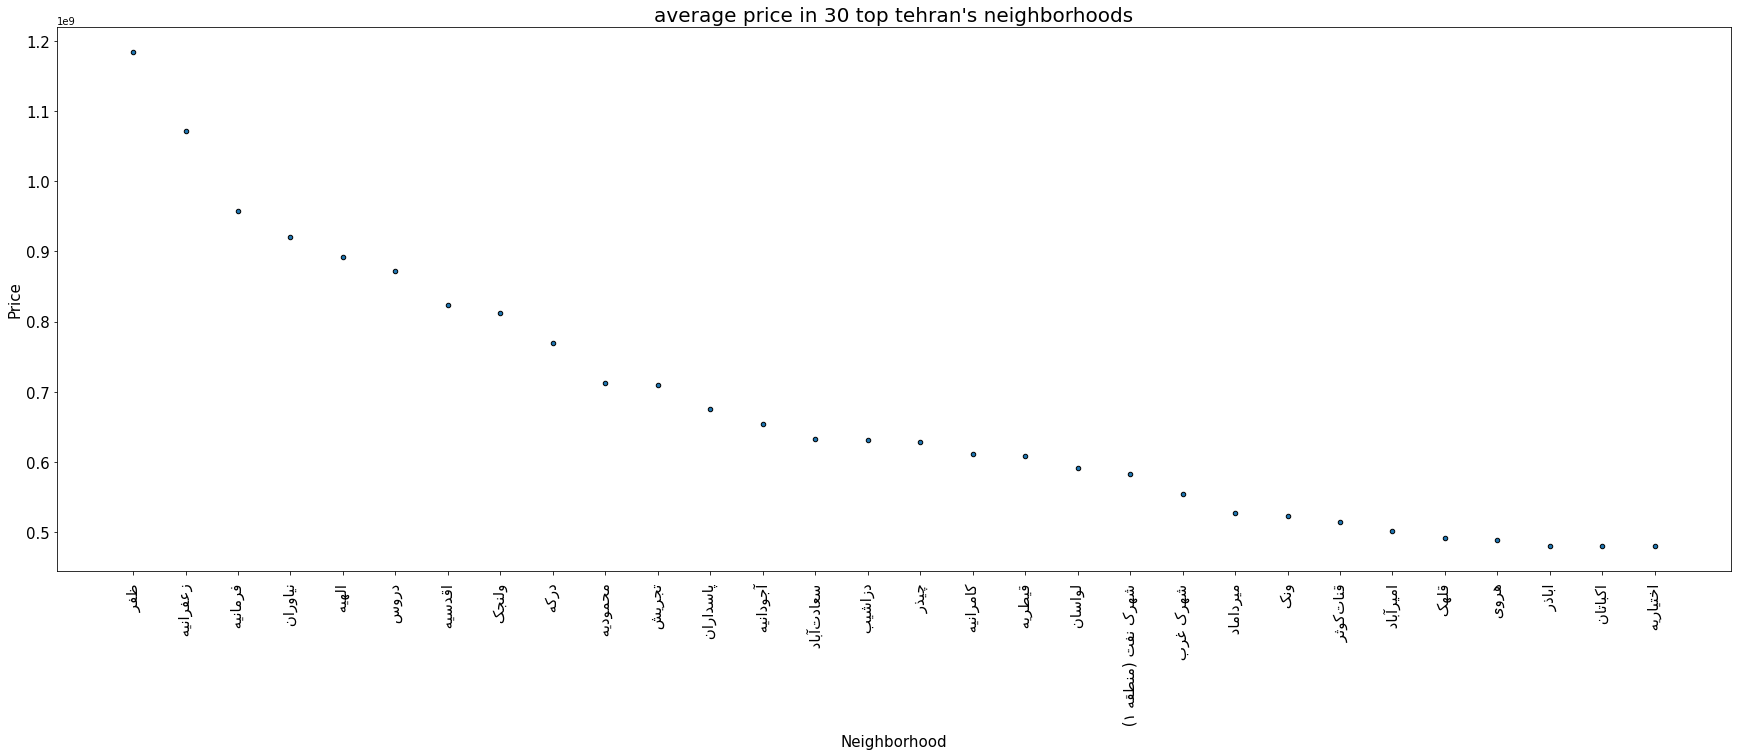

In [24]:
plt.figure(figsize=(30,10))
plt.scatter(x=persian_labels , y=table1.total_value, s=20, edgecolors='k')
plt.title("average price in 30 top tehran's neighborhoods",fontsize = 20)
plt.xlabel('Neighborhood',fontsize = 15)
plt.ylabel('Price',fontsize = 15)
plt.xticks(fontsize = 15,rotation = 90)
plt.yticks(fontsize=15)
plt.show()

#### More explotory and visualization for one of neighborhoods:سعادت آباد

In [25]:
saadat_File = df[(df['neighborhood'].str.contains('سعادت'))]
saadat_File

,total_value,neighborhood,area,year,deposit,rent,elavator,parking,warehouse
8,4.003600e+08,سعادت‌آباد,180,1387,4.000000e+08,12000000.0,1,1,1
9,2.800000e+09,سعادت‌آباد,250,1399,2.800000e+09,0.0,1,1,1
20,1.600003e+09,سعادت‌آباد,165,1390,1.600000e+09,100000.0,1,1,1
21,5.008700e+08,سعادت‌آباد,220,1388,5.000000e+08,29000000.0,1,1,1
26,8.002700e+08,سعادت‌آباد,120,1389,8.000000e+08,9000000.0,1,1,1
...,...,...,...,...,...,...,...,...,...
12325,6.003600e+08,سعادت‌آباد,120,1398,6.000000e+08,12000000.0,1,1,1
12336,9.000000e+08,سعادت‌آباد,110,1398,9.000000e+08,0.0,1,1,1
12364,5.007500e+08,سعادت‌آباد,180,1399,5.000000e+08,25000000.0,1,1,1
12368,1.150000e+09,سعادت‌آباد,160,1390,1.150000e+09,0.0,1,1,1


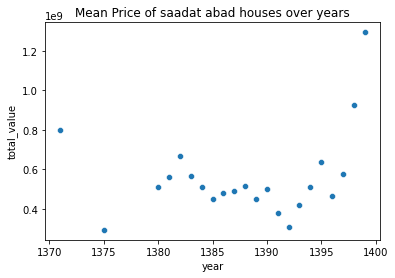

In [26]:
saadat_mean_price = saadat_File.groupby('year')['total_value'].mean().reset_index()
sns.scatterplot(x='year', y ='total_value' ,data = saadat_mean_price)
plt.title('Mean Price of saadat abad houses over years')
plt.show()

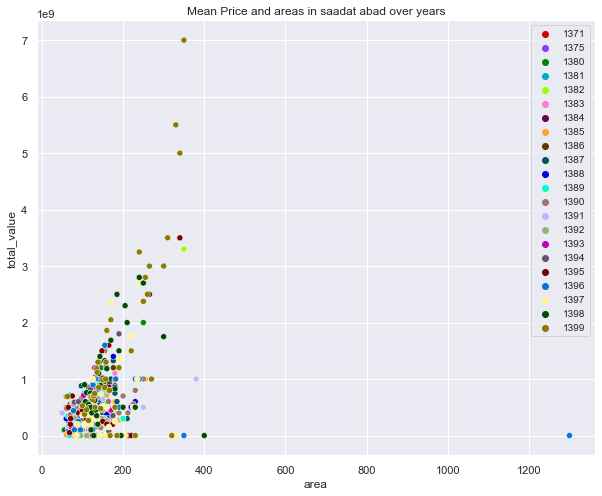

In [27]:
sns.set(rc={'figure.figsize':(10,8)})
palette = sns.color_palette(cc.glasbey, n_colors=22)#Create a palette with 22 colors
saadat_mean_price2 = saadat_File.groupby(['year','area'])['total_value'].mean().reset_index()
sns.scatterplot(x='area', y ='total_value' ,data = saadat_mean_price2,hue = 'year',palette=palette)
plt.title('Mean Price and areas in saadat abad over years')
plt.legend(loc = 1,prop={'size': 10})
plt.show()


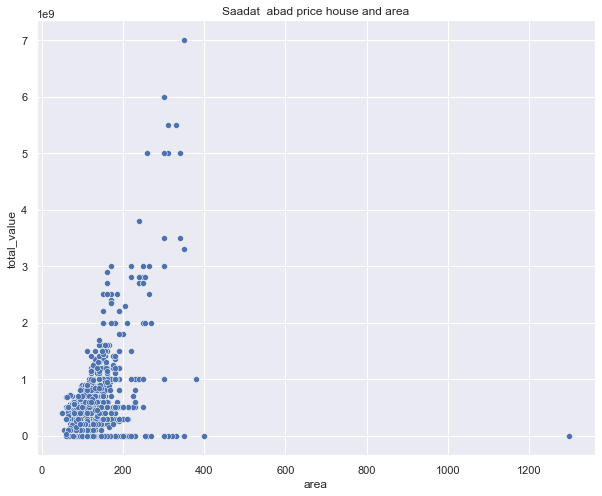

In [28]:
sns.scatterplot(x='area', y ='total_value' ,data = saadat_File)
plt.title('Saadat  abad price house and area')
plt.show()

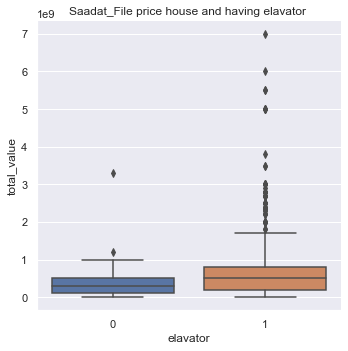

In [29]:
sns.catplot(x="elavator", y="total_value", data=saadat_File, kind="box")
plt.title('Saadat_File price house and having elavator ')
plt.show()

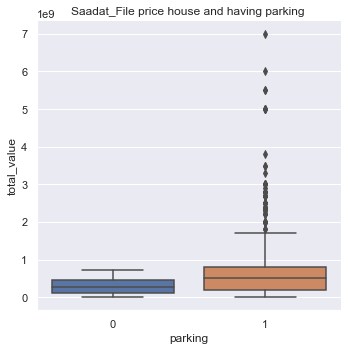

In [30]:
sns.catplot(x="parking", y="total_value", data=saadat_File, kind="box")
plt.title('Saadat_File price house and having parking ')
plt.show()

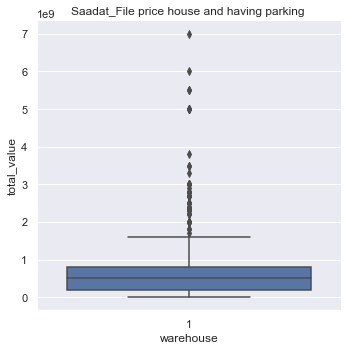

In [31]:
#having warehouse does not affect house prices in saadat abad
sns.catplot(x="warehouse", y="total_value", data=saadat_File, kind="box")
plt.title('Saadat_File price house and having parking ')
plt.show()

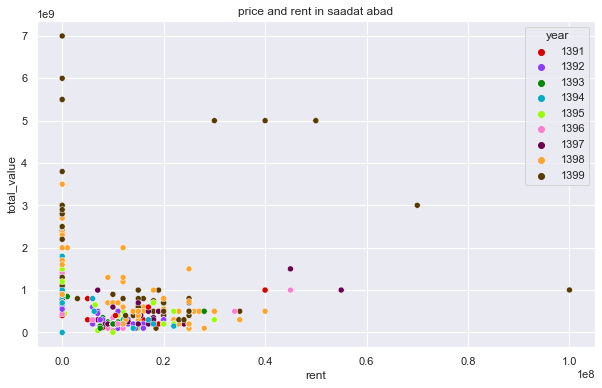

In [32]:
#High dispersion of house price and rent in 1399
palette = sns.color_palette(cc.glasbey, n_colors=9)
saadat_File2 = saadat_File[saadat_File['year'] > 1390]
sns.set(rc={'figure.figsize':(10,6)})
sns.scatterplot(x='rent', y ='total_value' ,data = saadat_File2, hue= 'year',palette=palette)
plt.title('price and rent in saadat abad')
plt.show()

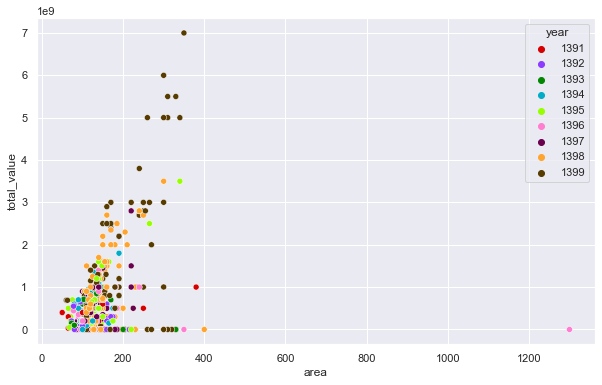

In [33]:
sns.set(rc={'figure.figsize':(10,6)})
sns.scatterplot(x='area', y ='total_value' ,hue = 'year',data = saadat_File2,palette=palette)
plt.show()

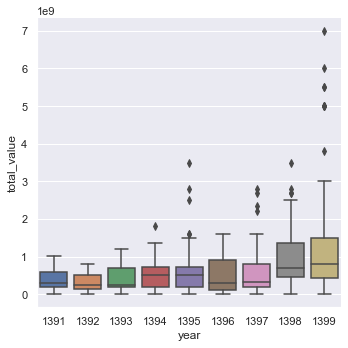

In [34]:
#Impact of the year of build on the house prices
sns.catplot(x="year", y="total_value", kind="box", data=saadat_File2)
plt.show()

####

In [35]:
table0 = pd.pivot_table(df, values='total_value', index=['year','neighborhood'],aggfunc=np.mean).sort_index()
table0

total_value
year neighborhood                 
1363 آجودانیه         3.000000e+08
     آذربایجان        1.544073e+08
     آهنگ             3.500000e+08
     اختیاریه         1.002100e+08
     افسریه           1.350030e+08
...                            ...
1399 گرگان            3.000000e+08
     گمرک             1.200000e+08
     گیشا (کوی نصر)   6.622422e+08
     یافت‌آباد        1.600240e+08
     یوسف‌آباد        4.430264e+08

[2041 rows x 1 columns]

In [36]:
year99 = table0.loc[('1399', ) , :]

In [37]:
year99

,total_value
neighborhood,
آبشار تهران,2.137918e+08
آجودانیه,7.181028e+08
آذربایجان,4.040480e+08
آذری,1.775300e+08
آهنگ,6.333333e+08
...,...
گرگان,3.000000e+08
گمرک,1.200000e+08
گیشا (کوی نصر),6.622422e+08


In [38]:
labels99 = list(year99.index)
persian_labels99 = [get_display(reshape(label)) for label in labels99]

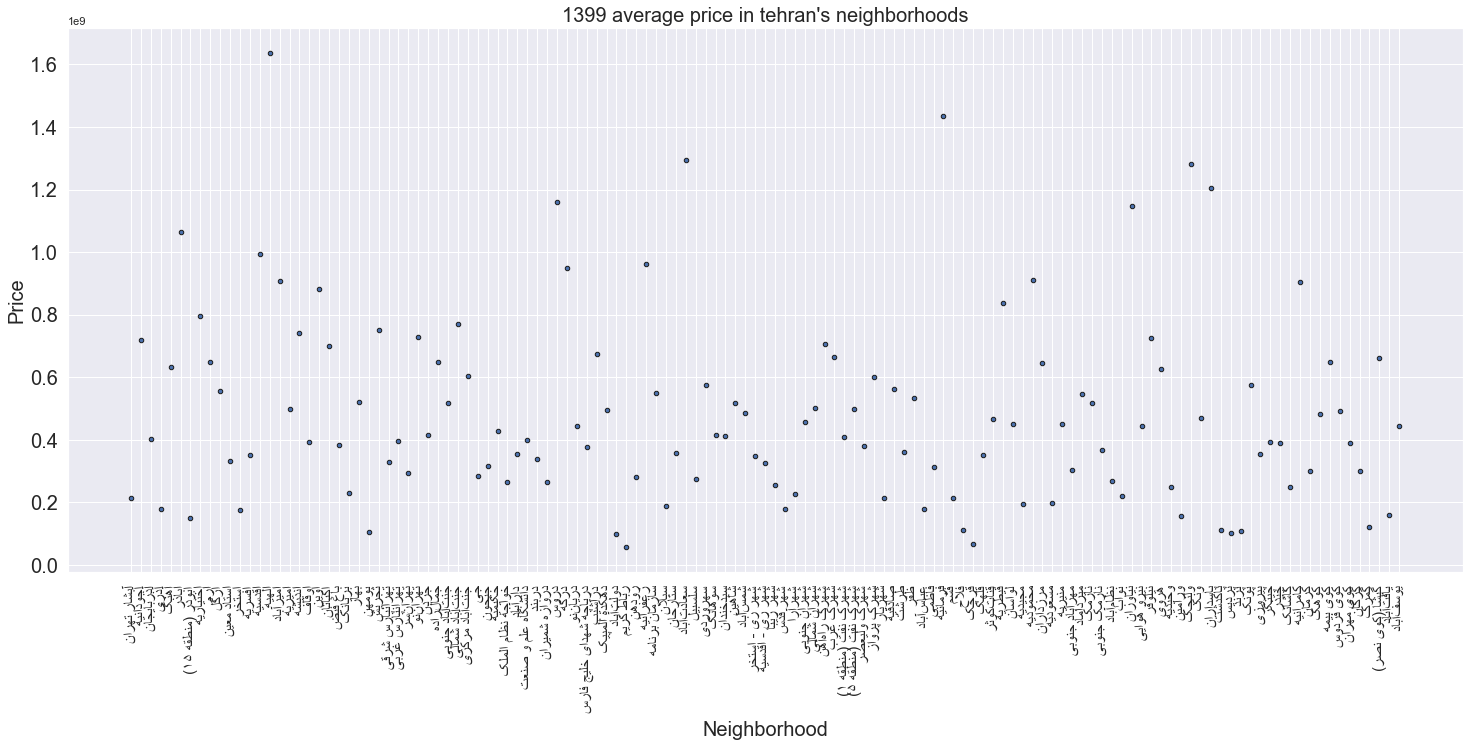

In [39]:
plt.figure(figsize=(25,10))
plt.scatter(x=persian_labels99 , y=year99.total_value, s=20, edgecolors='k')
plt.title("1399 average price in tehran's neighborhoods",fontsize = 20)
plt.xlabel('Neighborhood',fontsize = 20)
plt.ylabel('Price',fontsize = 20)
plt.xticks(fontsize = 15,rotation = 90)
plt.yticks(fontsize=20)
plt.show()

In [40]:
df[df['total_value'] > 1.0e+10 ]#row11087??>>noise?

,total_value,neighborhood,area,year,deposit,rent,elavator,parking,warehouse
2210,1.500000e+10,الهیه,200,1399,1.500000e+10,0.0,1,1,1
3103,1.200000e+10,ولنجک,540,1399,1.200000e+10,0.0,1,1,1
4995,1.300000e+10,نیاوران,600,1399,1.300000e+10,0.0,1,1,1
5505,1.200000e+10,زعفرانیه,600,1398,1.200000e+10,0.0,1,1,1
6431,1.600000e+10,زعفرانیه,800,1398,1.600000e+10,0.0,1,1,1
6661,1.200030e+10,نیاوران,600,1399,1.200000e+10,10000000.0,1,1,1
7336,1.500000e+10,فرمانیه,900,1395,1.500000e+10,0.0,1,1,1
11087,5.000014e+10,ظفر,50,1392,5.000000e+10,4500000.0,1,0,1


In [41]:
#noisy data value  == 0
df[df['total_value'] == 0]

,total_value,neighborhood,area,year,deposit,rent,elavator,parking,warehouse
11,0.0,اختیاریه,110,1396,0.0,0.0,1,1,1
12,0.0,فرمانیه,500,1395,0.0,0.0,1,1,1
13,0.0,اقدسیه,360,1399,0.0,0.0,1,1,1
18,0.0,پاسداران,130,1396,0.0,0.0,1,1,1
33,0.0,فرمانیه,210,1387,0.0,0.0,1,1,1
...,...,...,...,...,...,...,...,...,...
12345,0.0,حکیمیه,101,1399,0.0,0.0,1,1,1
12347,0.0,ولنجک,310,1392,0.0,0.0,1,1,1
12351,0.0,آهنگ,65,1390,0.0,0.0,0,1,1
12367,0.0,مرزداران,90,1396,0.0,0.0,1,1,1


In [42]:
df[df['total_value'] == 0]['rent'].mean(),df[df['total_value'] == 0]['deposit'].mean()

(0.0, 0.0)

In [43]:
df[df['total_value'] == 0]['neighborhood'].value_counts()

نیاوران        129
سعادت‌آباد     108
فرمانیه        103
زعفرانیه        95
الهیه           91
              ... 
فلاح             1
دریان‌نو         1
رباط کریم        1
شهریار           1
حکیمیه           1
Name: neighborhood, Length: 103, dtype: Int64

In [44]:
#remove zero values
(df.shape[0]-1498)/df.shape[0]#>>decrese 13% of data size 

0.871625674865027

In [45]:
#Max of total value
df[df['total_value'] >= 5e+10 ]

,total_value,neighborhood,area,year,deposit,rent,elavator,parking,warehouse
11087,5.000014e+10,ظفر,50,1392,5.000000e+10,4500000.0,1,0,1


In [46]:
df[df['year'] < 1370 ]['total_value'].mean()

326453385.5421687

In [47]:
df[df['year'] > 1398 ]['total_value'].mean()

747557760.5628355

In [48]:
df[df['area'] == 3.000000e+05]

,total_value,neighborhood,area,year,deposit,rent,elavator,parking,warehouse
6478,600750000.0,ظفر,300000,1372,600000000.0,25000000.0,0,1,1


In [49]:
df[df['area'] == 100000]

,total_value,neighborhood,area,year,deposit,rent,elavator,parking,warehouse
7227,150180000.0,کوی فردوس,100000,1398,150000000.0,6000000.0,1,1,1
10712,200045000.0,تهرانپارس شرقی,100000,1395,200000000.0,1500000.0,1,0,1


In [50]:
df[df['area'] == 5]

,total_value,neighborhood,area,year,deposit,rent,elavator,parking,warehouse
2295,0.0,اکباتان,5,1363,0.0,0.0,0,1,1


In [51]:
df[df['area'] <= 40]['neighborhood'].value_counts().sort_values(ascending=False).head(5)

پیروزی        7
جیحون         4
سلسبیل        3
باغ فیض       3
آذربایجان     3
Name: neighborhood, dtype: Int64

In [52]:
df[df['area'] <= 40]['total_value'].mean()

85036931.3239706

In [53]:
df[df['area'] <= 40]['rent'].mean()

1231044.1323529412

In [54]:
df[(df['area'] >= 1000)]

,total_value,neighborhood,area,year,deposit,rent,elavator,parking,warehouse
1413,8.000000e+09,پونک,1000,1399,8.000000e+09,0.0,1,1,1
2415,0.000000e+00,الهیه,3200,1399,0.000000e+00,0.0,1,1,1
3465,0.000000e+00,فرمانیه,1800,1399,0.000000e+00,0.0,1,1,1
4641,0.000000e+00,الهیه,1200,1399,0.000000e+00,0.0,1,1,1
5232,0.000000e+00,زعفرانیه,1400,1398,0.000000e+00,0.0,1,1,1
6297,0.000000e+00,سعادت‌آباد,1300,1396,0.000000e+00,0.0,1,1,1
6478,6.007500e+08,ظفر,300000,1372,6.000000e+08,25000000.0,0,1,1
7227,1.501800e+08,کوی فردوس,100000,1398,1.500000e+08,6000000.0,1,1,1
10712,2.000450e+08,تهرانپارس شرقی,100000,1395,2.000000e+08,1500000.0,1,0,1


In [55]:
df[(df['area'] >= 1000)]['total_value'].mean()

994552777.7777778

In [56]:
df[(df['area'] >= 1000)]['rent'].mean()

3611111.111111111

In [57]:
df.head()

,total_value,neighborhood,area,year,deposit,rent,elavator,parking,warehouse
0,2.000900e+09,ولنجک,270,1399,2.000000e+09,30000000.0,1,1,1
1,2.001200e+08,کوی فردوس,70,1387,2.000000e+08,4000000.0,0,1,1
2,3.502550e+08,پونک,120,1395,3.500000e+08,8500000.0,1,1,1
3,2.003000e+08,هروی,110,1395,2.000000e+08,10000000.0,1,1,1
4,2.001800e+08,پونک,80,1387,2.000000e+08,6000000.0,1,1,1


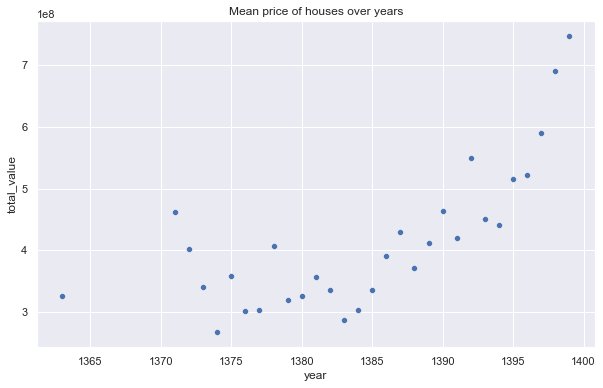

In [58]:
table2 = pd.pivot_table(df, values='total_value', index=['year'],aggfunc=np.mean).sort_values(by=['total_value'],ascending=False)
sns.scatterplot(x='year', y ='total_value' ,data = table2)
plt.title('Mean price of houses over years')
plt.show()

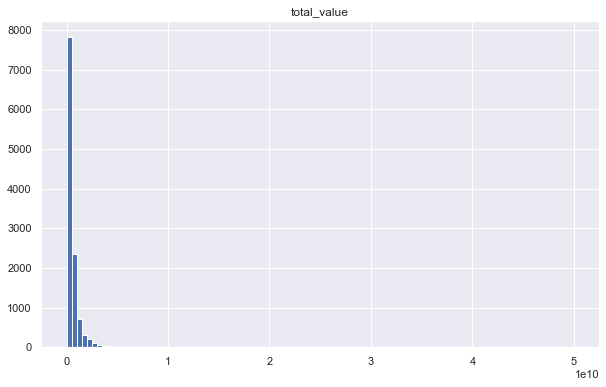

In [59]:
df.hist(column='total_value', bins=100)
plt.show()

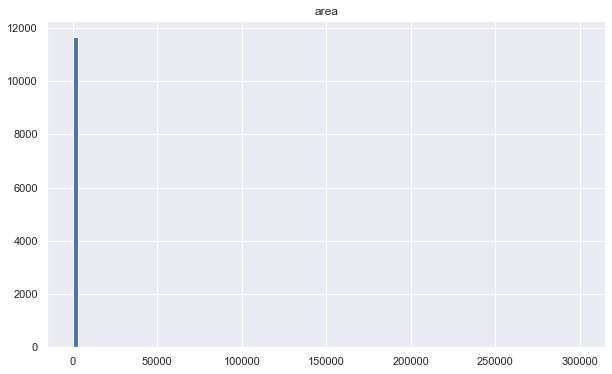

In [60]:
df.hist(column='area', bins=100)
plt.show()

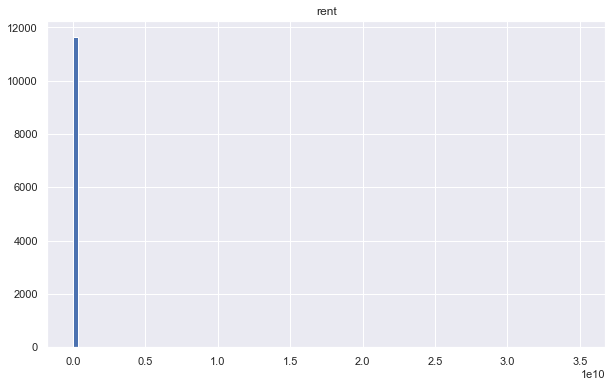

In [61]:
df.hist(column='rent', bins=100)
plt.show()

In [62]:
sns.set(style='whitegrid')

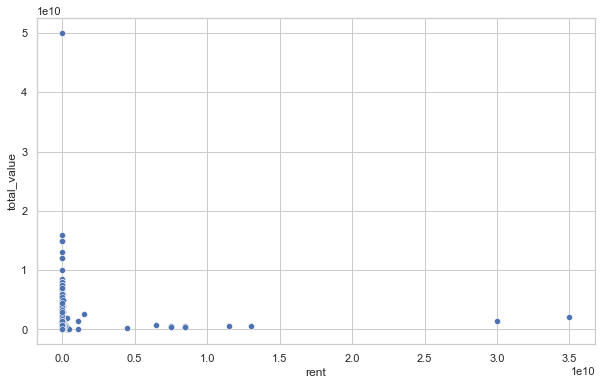

In [63]:
sns.scatterplot(x="rent",y="total_value",data=df)
plt.show()

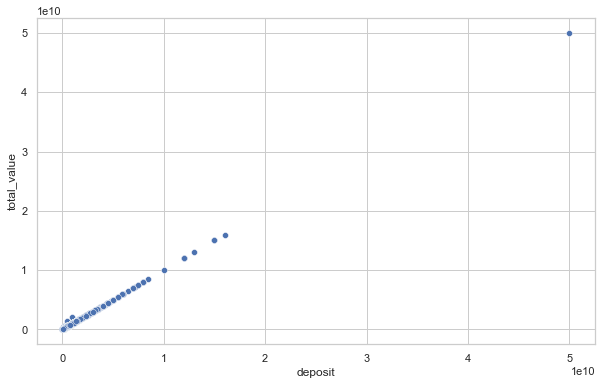

In [64]:
sns.scatterplot(x="deposit",y="total_value",data=df)
plt.show()

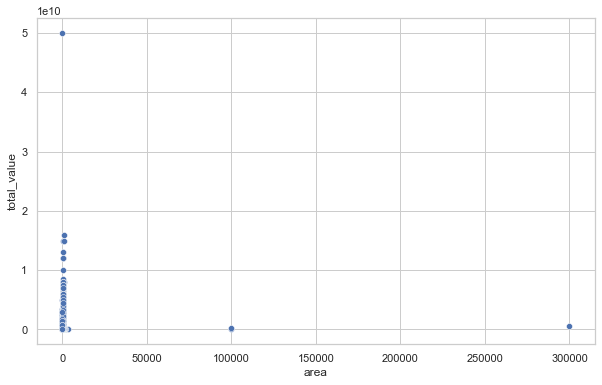

In [65]:
sns.scatterplot(x="area",y="total_value",data=df)
plt.show()

In [66]:
df.groupby('elavator')['total_value'].describe().T#تفاوت در میانه دو کلاس مشهود است

elavator,0,1
count,2.097000e+03,9.572000e+03
mean,2.257952e+08,5.744249e+08
std,2.851241e+08,9.806918e+08
min,0.000000e+00,0.000000e+00
25%,8.000300e+07,1.301200e+08
50%,1.500000e+08,3.400015e+08
75%,2.800000e+08,6.700000e+08
max,3.700000e+09,5.000014e+10


In [67]:
df.groupby('parking')['total_value'].describe().T#تفاوت در میانه دو کلاس مشهود است

parking,0,1
count,1.162000e+03,1.050700e+04
mean,1.936094e+08,5.469605e+08
std,1.475484e+09,8.119518e+08
min,0.000000e+00,0.000000e+00
25%,5.503375e+07,1.201800e+08
50%,1.001350e+08,3.007500e+08
75%,1.987500e+08,6.200000e+08
max,5.000014e+10,1.600000e+10


In [68]:
df.groupby('warehouse')['total_value'].describe().T#تفاوت در میانه دو کلاس چندان مشهود نیست

warehouse,0,1
count,1.0,1.166800e+04
mean,350090000.0,5.117876e+08
std,NaN,9.063651e+08
min,350090000.0,0.000000e+00
25%,350090000.0,1.002400e+08
50%,350090000.0,3.001350e+08
75%,350090000.0,6.000000e+08
max,350090000.0,5.000014e+10


### Preprocessing

In [69]:
#ducplicated rows
sum(df.duplicated())

0

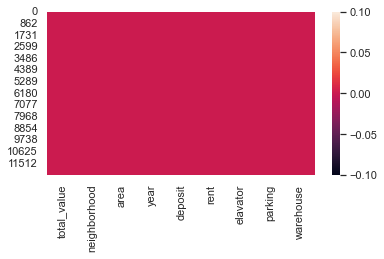

In [70]:
#No Null values
sns.set(rc = {'figure.figsize':(6,3)})
sns.heatmap(df.isnull())
plt.show()

In [71]:
df[df['total_value'] == 0]

,total_value,neighborhood,area,year,deposit,rent,elavator,parking,warehouse
11,0.0,اختیاریه,110,1396,0.0,0.0,1,1,1
12,0.0,فرمانیه,500,1395,0.0,0.0,1,1,1
13,0.0,اقدسیه,360,1399,0.0,0.0,1,1,1
18,0.0,پاسداران,130,1396,0.0,0.0,1,1,1
33,0.0,فرمانیه,210,1387,0.0,0.0,1,1,1
...,...,...,...,...,...,...,...,...,...
12345,0.0,حکیمیه,101,1399,0.0,0.0,1,1,1
12347,0.0,ولنجک,310,1392,0.0,0.0,1,1,1
12351,0.0,آهنگ,65,1390,0.0,0.0,0,1,1
12367,0.0,مرزداران,90,1396,0.0,0.0,1,1,1


In [72]:
#Remove zero values
df.drop(df[df.total_value == 0].index, inplace=True)

In [73]:
df.shape

(10174, 9)

#### reduce skewness of total_value and area by cox-box transformation

In [74]:
#Checking skewness
print(f"Skewness of total_value :\n{df.total_value.skew()}")

Skewness of total_value :
17.575302758741195


In [75]:
total_value_transformed, total_value_lambd = stats.boxcox(df.total_value)

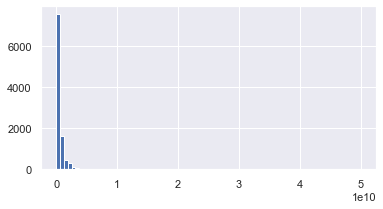

In [76]:
plt.hist(df.total_value, bins=80)
plt.show()

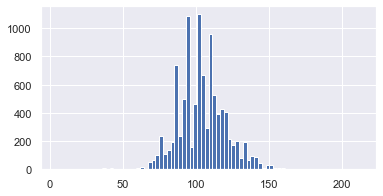

In [77]:
plt.hist(total_value_transformed, bins=80)
plt.show()

In [78]:
print("Skewness for new total_value is: ", stats.skew(total_value_transformed))

Skewness for new total_value is:  0.12180692415069788


In [79]:
df["fitted_total_value"] = total_value_transformed

In [80]:
df.head()

,total_value,neighborhood,area,year,deposit,rent,elavator,parking,warehouse,fitted_total_value
0,2.000900e+09,ولنجک,270,1399,2.000000e+09,30000000.0,1,1,1,133.455127
1,2.001200e+08,کوی فردوس,70,1387,2.000000e+08,4000000.0,0,1,1,94.994175
2,3.502550e+08,پونک,120,1395,3.500000e+08,8500000.0,1,1,1,103.246740
3,2.003000e+08,هروی,110,1395,2.000000e+08,10000000.0,1,1,1,95.006923
4,2.001800e+08,پونک,80,1387,2.000000e+08,6000000.0,1,1,1,94.998426


In [81]:
#Remove outliers
def outlier_check(x):
    threshold = 3
    outlier = []
    for i in x:
        z = (i-np.mean(x))/np.std(x)
        if z > threshold:
            outlier.append(i)
    return outlier

In [82]:
len(outlier_check(df.fitted_total_value))

40

In [84]:
total_value_outliers = outlier_check(df.fitted_total_value)

Df = pd.DataFrame()

Df = pd.concat([Df,df.query(f'fitted_total_value not in {total_value_outliers}')])

print(len(total_value_outliers))

40


In [85]:
df.shape[0] - Df.shape[0]

40

In [86]:
# Target Encoding
enc = TargetEncoder(cols=['neighborhood'])

In [87]:
Dff = Df.copy()
Dff = enc.fit_transform(Dff,Dff.fitted_total_value)

In [88]:
Dff.head()

,total_value,neighborhood,area,year,deposit,rent,elavator,parking,warehouse,fitted_total_value
0,2.000900e+09,112.042255,270,1399,2.000000e+09,30000000.0,1,1,1,133.455127
1,2.001200e+08,99.155814,70,1387,2.000000e+08,4000000.0,0,1,1,94.994175
2,3.502550e+08,98.471647,120,1395,3.500000e+08,8500000.0,1,1,1,103.246740
3,2.003000e+08,106.597776,110,1395,2.000000e+08,10000000.0,1,1,1,95.006923
4,2.001800e+08,98.471647,80,1387,2.000000e+08,6000000.0,1,1,1,94.998426


#### Correlation Checking

In [89]:
Dff.columns

Index(['total_value', 'neighborhood', 'area', 'year', 'deposit', 'rent',
       'elavator', 'parking', 'warehouse', 'fitted_total_value'],
      dtype='object')

In [90]:
#Remove unnecessary column
Dff.drop(Dff.columns[[0,4]], axis = 1, inplace = True)

In [91]:
Dff.corr()

,neighborhood,area,year,rent,elavator,parking,warehouse,fitted_total_value
neighborhood,1.000000,0.001211,0.058421,0.027858,0.334791,0.376235,0.006292,0.581500
area,0.001211,1.000000,-0.019927,0.000171,-0.010128,0.001145,0.000224,0.012968
year,0.058421,-0.019927,1.000000,0.017768,0.550518,0.258164,0.005323,0.237282
rent,0.027858,0.000171,0.017768,1.000000,0.017880,0.013499,0.000364,0.026780
elavator,0.334791,-0.010128,0.550518,0.017880,1.000000,0.439887,-0.004918,0.346407
parking,0.376235,0.001145,0.258164,0.013499,0.439887,1.000000,-0.003496,0.351107
warehouse,0.006292,0.000224,0.005323,0.000364,-0.004918,-0.003496,1.000000,0.000142
fitted_total_value,0.581500,0.012968,0.237282,0.026780,0.346407,0.351107,0.000142,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

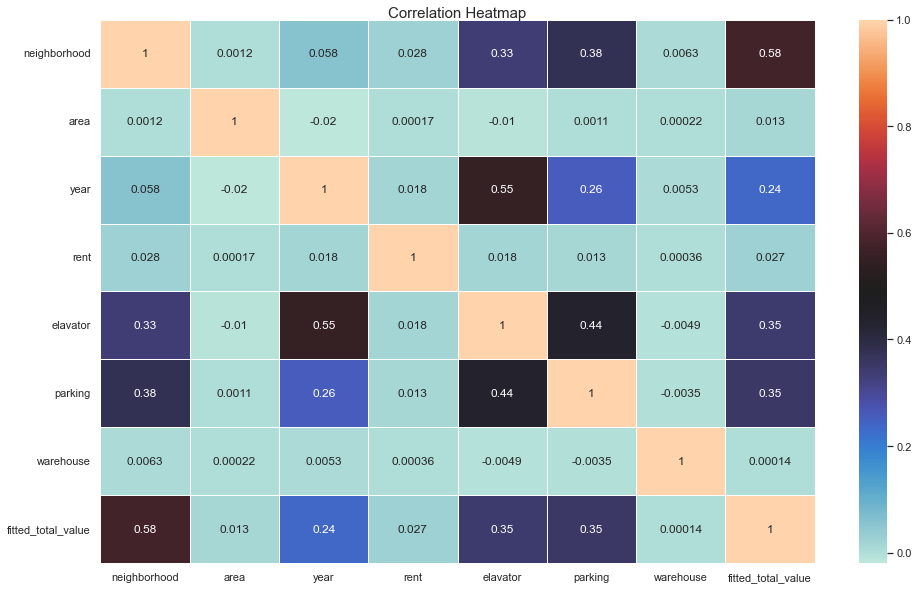

In [92]:
plt.figure(figsize=(16,10))
HeatMap=sns.heatmap(Dff.corr(),annot=True,cmap=sns.color_palette("icefire", as_cmap=True),linewidths=0.5)
HeatMap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=2)

In [ ]:
#remove elavator because high correlation with year and parking 

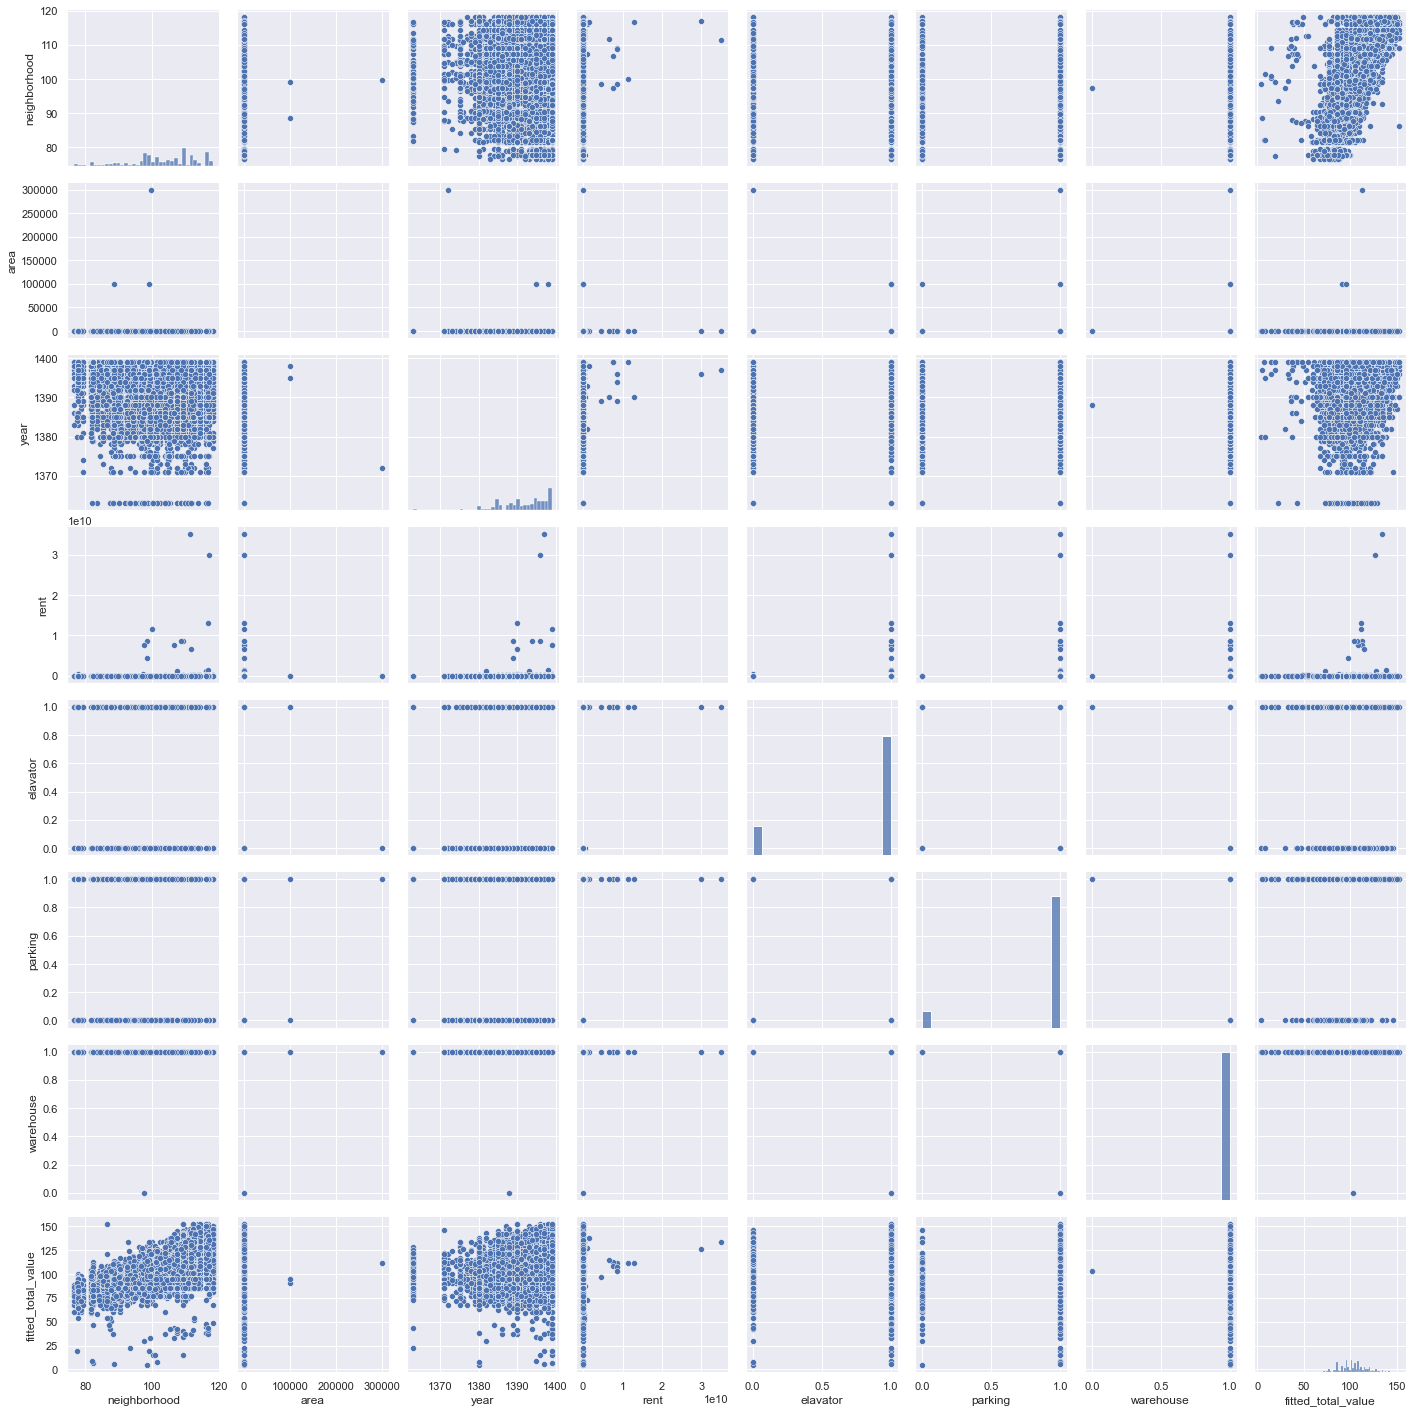

In [93]:
sns.pairplot(Dff)

In [94]:
scaler = MinMaxScaler()#min_max scaling
Dff = pd.DataFrame(scaler.fit_transform(Dff), columns = Dff.columns)
Dff.head()

,neighborhood,area,year,rent,elavator,parking,warehouse,fitted_total_value
0,0.855064,0.000877,1.000000,0.000857,1.0,1.0,1.0,0.871339
1,0.543228,0.000210,0.666667,0.000114,0.0,1.0,1.0,0.611761
2,0.526672,0.000377,0.888889,0.000243,1.0,1.0,1.0,0.667459
3,0.723314,0.000343,0.888889,0.000286,1.0,1.0,1.0,0.611847
4,0.526672,0.000243,0.666667,0.000171,1.0,1.0,1.0,0.611790


### Modeling

#### Linear Regression

In [121]:
Dff.columns

Index(['neighborhood', 'area', 'year', 'rent', 'elavator', 'parking',
       'warehouse', 'fitted_total_value'],
      dtype='object')

In [122]:
X = Dff.drop(Dff.columns[[4,7]], axis = 1)

In [123]:
Y = Dff['fitted_total_value']

In [124]:
x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=101)

In [125]:
lm = LinearRegression()

In [126]:
lm.fit(x_train, y_train)

LinearRegression()

In [127]:
print(lm.intercept_)

0.42860662205795064


In [128]:
lm.coef_

array([ 0.25591347,  0.14242686,  0.10851506,  0.07239834,  0.03486514,
       -0.0430238 ])

In [129]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=["Coeff"])
cdf

,Coeff
neighborhood,0.255913
area,0.142427
year,0.108515
rent,0.072398
parking,0.034865
warehouse,-0.043024


In [130]:
predict = lm.predict(x_test)

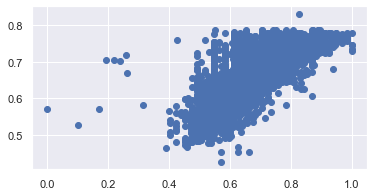

In [131]:
plt.scatter(y_test, predict)

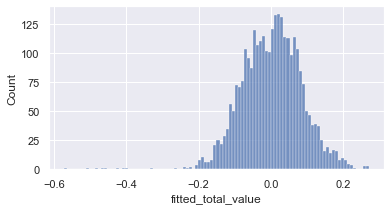

In [132]:
sns.histplot((y_test-predict), bins=100)
plt.show()

In [133]:
metrics.mean_absolute_error(y_test, predict)

0.06539458925603973

In [134]:
metrics.mean_squared_error(y_test, predict)

0.006967205042177278

In [135]:
import math
math.sqrt(metrics.mean_squared_error(y_test, predict))

0.08346978520505056

In [136]:
r2_score(y_test, predict)

0.4108093309836247

#### DecisionTreeRegressor for data without scaling

In [105]:
enc = TargetEncoder(cols=['neighborhood'])

In [106]:
Df = enc.fit_transform(Df,Df.fitted_total_value)

In [107]:
X = Df.drop(columns = ['fitted_total_value','deposit'])
y = Df['fitted_total_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(f"shape of x train: {X_train.shape}")
print(f"shape of y train: {y_train.shape}")
print(f"shape of x test: {X_test.shape}")
print(f"shape of y test: {y_test.shape}")

shape of x train: (7093, 8)
shape of y train: (7093,)
shape of x test: (3041, 8)
shape of y test: (3041,)


In [118]:
model = DecisionTreeRegressor()

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=10,
                  n_jobs=1,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)
print(-gs.best_score_)

{'max_depth': 10, 'min_samples_split': 10}
0.06758225763051533


In [119]:
new_model = DecisionTreeRegressor(max_depth=10,min_samples_split=10)
new_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=10)

In [120]:
y_pred = new_model.predict(X_test)
train_score = round(new_model.score(X_train, y_train), 4) 
test_score = round(new_model.score(X_test, y_test), 4)
RMSE = round(np.sqrt(mean_squared_error(y_test, y_pred)))
print(f"The coefficient of determination (R2 score) in the training set is {train_score:0.2%} for DecisionTreeRegressor model.")
print(f"The coefficient of determination (R2 score) in the testing set is {test_score:0.2%} for DecisionTreeRegressor model.")
print(f"RMSE is {RMSE:,} for DecisionTreeRegressor model.")

The coefficient of determination (R2 score) in the training set is 99.98% for DecisionTreeRegressor model.
The coefficient of determination (R2 score) in the testing set is 99.97% for DecisionTreeRegressor model.
RMSE is 0 for DecisionTreeRegressor model.
